# Exploratory Data Analysis & Modeling

In [1]:
from radiant_mlhub import Dataset, Collection, client, get_session
import tarfile
from pathlib import Path
import os
import shutil
from io import BytesIO
from glob import glob
from tqdm.notebook import tqdm
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL as pil
import json
import seaborn as sns

## Load Data

In [5]:
# Main dataset
dataset_df = pd.read_json("dataset_df.json")

# View first five rows
dataset_df.head()

,source_file,label
0,C:\Users\jenna\Documents\MCP\Spring_2022\MUSA6...,banana
1,C:\Users\jenna\Documents\MCP\Spring_2022\MUSA6...,maize
2,C:\Users\jenna\Documents\MCP\Spring_2022\MUSA6...,legumes
3,C:\Users\jenna\Documents\MCP\Spring_2022\MUSA6...,legumes
4,C:\Users\jenna\Documents\MCP\Spring_2022\MUSA6...,structure


In [6]:
# Dataframe containing the keys
key_df = pd.read_json("key_df.json")

# View first five rows
key_df.head()

,index,source_file,label
0,4,C:\Users\jenna\Documents\MCP\Spring_2022\MUSA6...,structure
1,5,C:\Users\jenna\Documents\MCP\Spring_2022\MUSA6...,structure
2,8,C:\Users\jenna\Documents\MCP\Spring_2022\MUSA6...,structure
3,9,C:\Users\jenna\Documents\MCP\Spring_2022\MUSA6...,structure
4,10,C:\Users\jenna\Documents\MCP\Spring_2022\MUSA6...,structure


In [7]:
# Output path where the data is located and version of the path as a string
output_path = Path("./data/").resolve()
output_path_str = str(Path(output_path))

In [8]:
# Access to the data on local system
data_root=f"{output_path}/Images" 

In [10]:
# Print classes from the Images folder
selectedClasses = (os.listdir(data_root))
print (selectedClasses)

['banana', 'forest', 'legumes', 'maize', 'other', 'structure']


In [11]:
# How many images are in the dataset
print("Total images in the dataset: ", len(dataset_df))

Total images in the dataset:  2606


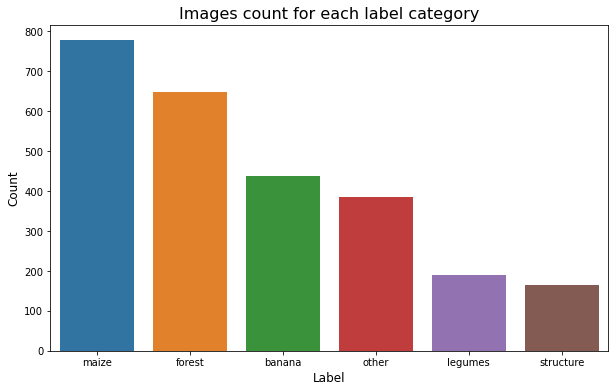

In [14]:
# Check image counts per category, just for reference
ac_count = dataset_df['label'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=ac_count.index, y=ac_count.values)
plt.title("Images count for each label category", fontsize=16)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show();

In [17]:
import keras
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf #deep learning


### Plot some sample images before any data augmentation

In [22]:
TRAINING_DATA_DIR = str(data_root) #data directory for training

In [23]:
train_datagen_plot = ImageDataGenerator()
train_generator_plot = train_datagen_plot.flow_from_directory(
    TRAINING_DATA_DIR,
    target_size=(224, 224), #image size
    shuffle = True, #randomize the data for training
    subset='training')

Found 2606 images belonging to 6 classes.


In [43]:
#plots images with labels
def plots(ims, figsize = (10,10), rows=4, interp=False, titles=None, maxNum = 10):
    if type(ims[0] is np.ndarray):
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
           
    f = plt.figure(figsize=figsize)
    cols = maxNum // rows if maxNum % 2 == 0 else maxNum//rows + 1
    for i in range(maxNum):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=12)
        plt.imshow(ims[i], interpolation = None if interp else 'none')  

In [50]:
train_generator_plot.reset()
imgs, labels = train_generator_plot.next() # images to plot

# including labels
labelNames=[]
labelIndices=[np.where(r==1)[0][0] for r in labels]

for ind in labelIndices:
    for labelName,labelIndex in train_generator_plot.class_indices.items():
        if labelIndex == ind:
            labelNames.append(labelName)

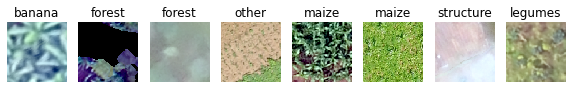

In [51]:
plots(imgs, rows=1, titles = labelNames, maxNum=8)
